<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(3_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n30.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,59.513188,23.197690,91.696478,46.811860,-28.573468,202.645748,228.505453,-25.859706
1,0.0,1.0,98.909504,60.565735,25.230476,63.924326,489.559232,748.189273,-69.103101,817.292373
2,0.0,2.0,45.176289,52.966996,37.403713,71.281602,868.534510,1085.363109,121.579091,963.784018
3,0.0,3.0,98.073087,41.367550,66.671230,48.516207,-29.079293,235.548781,28.744139,206.804641
4,0.0,4.0,57.114543,50.051291,22.253988,97.594194,1151.635210,1388.649226,513.503274,875.145952
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,42.931768,26.163855,65.817183,20.750221,113.167536,278.830563,-1156.670396,1435.500959
59996,999.0,56.0,73.667729,78.956404,46.149260,57.440590,-1140.921521,-874.707537,922.801695,-1797.509233
59997,999.0,57.0,55.298182,97.494140,21.074215,39.046146,5460.203046,5683.115729,403.683873,5279.431856
59998,999.0,58.0,40.599903,89.326199,53.579266,45.375976,4860.991119,5099.872463,474.928001,4624.944463


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,59.513188,23.197690,91.696478,46.811860,-28.573468,202.645748,228.505453,-25.859706
1,0.0,1.0,98.909504,60.565735,25.230476,63.924326,489.559232,748.189273,-69.103101,817.292373
2,0.0,2.0,45.176289,52.966996,37.403713,71.281602,868.534510,1085.363109,121.579091,963.784018
3,0.0,3.0,98.073087,41.367550,66.671230,48.516207,-29.079293,235.548781,28.744139,206.804641
4,0.0,4.0,57.114543,50.051291,22.253988,97.594194,1151.635210,1388.649226,513.503274,875.145952
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,42.931768,26.163855,65.817183,20.750221,113.167536,278.830563,-1156.670396,1435.500959
59996,999.0,56.0,73.667729,78.956404,46.149260,57.440590,-1140.921521,-874.707537,922.801695,-1797.509233
59997,999.0,57.0,55.298182,97.494140,21.074215,39.046146,5460.203046,5683.115729,403.683873,5279.431856
59998,999.0,58.0,40.599903,89.326199,53.579266,45.375976,4860.991119,5099.872463,474.928001,4624.944463


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    59.513188  23.197690  91.696478  46.811860   -28.573468   
      1.0    98.909504  60.565735  25.230476  63.924326   489.559232   
      2.0    45.176289  52.966996  37.403713  71.281602   868.534510   
      3.0    98.073087  41.367550  66.671230  48.516207   -29.079293   
      4.0    57.114543  50.051291  22.253988  97.594194  1151.635210   
...                ...        ...        ...        ...          ...   
999.0 55.0   42.931768  26.163855  65.817183  20.750221   113.167536   
      56.0   73.667729  78.956404  46.149260  57.440590 -1140.921521   
      57.0   55.298182  97.494140  21.074215  39.046146  5460.203046   
      58.0   40.599903  89.326199  53.579266  45.375976  4860.991119   
      59.0   93.312694  97.806824  34.323029  37.432559 -1657.469927   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     202.645748   228.505453   -25.859706  
      1.0     748.189273   -69.103101   817.292373  
      2.0    1085.363109   121.579091   963.784018  
      3.0     235.548781    28.744139   206.804641  
      4.0    1388.649226   513.503274   875.145952  
...                  ...          ...          ...  
999.0 55.0    278.830563 -1156.670396  1435.500959  
      56.0   -874.707537   922.801695 -1797.509233  
      57.0   5683.115729   403.683873  5279.431856  
      58.0   5099.872463   474.928001  4624.944463  
      59.0  -1384.594820  1338.580584 -2723.175404  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    59.513188  23.197690  91.696478  46.811860   -28.573468   
      1.0    98.909504  60.565735  25.230476  63.924326   489.559232   
      2.0    45.176289  52.966996  37.403713  71.281602   868.534510   
      3.0    98.073087  41.367550  66.671230  48.516207   -29.079293   
      4.0    57.114543  50.051291  22.253988  97.594194  1151.635210   
...                ...        ...        ...        ...          ...   
999.0 55.0   42.931768  26.163855  65.817183  20.750221   113.167536   
      56.0   73.667729  78.956404  46.149260  57.440590 -1140.921521   
      57.0   55.298182  97.494140  21.074215  39.046146  5460.203046   
      58.0   40.599903  89.326199  53.579266  45.375976  4860.991119   
      59.0   93.312694  97.806824  34.323029  37.432559 -1657.469927   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     202.645748   228.505453   -25.859706  
      1.0     748.189273   -69.103101   817.292373  
      2.0    1085.363109   121.579091   963.784018  
      3.0     235.548781    28.744139   206.804641  
      4.0    1388.649226   513.503274   875.145952  
...                  ...          ...          ...  
999.0 55.0    278.830563 -1156.670396  1435.500959  
      56.0   -874.707537   922.801695 -1797.509233  
      57.0   5683.115729   403.683873  5279.431856  
      58.0   5099.872463   474.928001  4624.944463  
      59.0  -1384.594820  1338.580584 -2723.175404  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,59.513188,23.197690,91.696478,46.811860,-28.573468,202.645748,228.505453,-25.859706
1,0.0,1.0,98.909504,60.565735,25.230476,63.924326,489.559232,748.189273,-69.103101,817.292373
2,0.0,2.0,45.176289,52.966996,37.403713,71.281602,868.534510,1085.363109,121.579091,963.784018
3,0.0,3.0,98.073087,41.367550,66.671230,48.516207,-29.079293,235.548781,28.744139,206.804641
4,0.0,4.0,57.114543,50.051291,22.253988,97.594194,1151.635210,1388.649226,513.503274,875.145952
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,42.931768,26.163855,65.817183,20.750221,113.167536,278.830563,-1156.670396,1435.500959
59996,999.0,56.0,73.667729,78.956404,46.149260,57.440590,-1140.921521,-874.707537,922.801695,-1797.509233
59997,999.0,57.0,55.298182,97.494140,21.074215,39.046146,5460.203046,5683.115729,403.683873,5279.431856
59998,999.0,58.0,40.599903,89.326199,53.579266,45.375976,4860.991119,5099.872463,474.928001,4624.944463


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    59.513188  23.197690  91.696478  46.811860   -28.573468   
      1.0    98.909504  60.565735  25.230476  63.924326   489.559232   
      2.0    45.176289  52.966996  37.403713  71.281602   868.534510   
      3.0    98.073087  41.367550  66.671230  48.516207   -29.079293   
      4.0    57.114543  50.051291  22.253988  97.594194  1151.635210   
...                ...        ...        ...        ...          ...   
999.0 55.0   42.931768  26.163855  65.817183  20.750221   113.167536   
      56.0   73.667729  78.956404  46.149260  57.440590 -1140.921521   
      57.0   55.298182  97.494140  21.074215  39.046146  5460.203046   
      58.0   40.599903  89.326199  53.579266  45.375976  4860.991119   
      59.0   93.312694  97.806824  34.323029  37.432559 -1657.469927   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     202.645748   228.505453   -25.859706  
      1.0     748.189273   -69.103101   817.292373  
      2.0    1085.363109   121.579091   963.784018  
      3.0     235.548781    28.744139   206.804641  
      4.0    1388.649226   513.503274   875.145952  
...                  ...          ...          ...  
999.0 55.0    278.830563 -1156.670396  1435.500959  
      56.0   -874.707537   922.801695 -1797.509233  
      57.0   5683.115729   403.683873  5279.431856  
      58.0   5099.872463   474.928001  4624.944463  
      59.0  -1384.594820  1338.580584 -2723.175404  

[60000 rows x 8 columns]

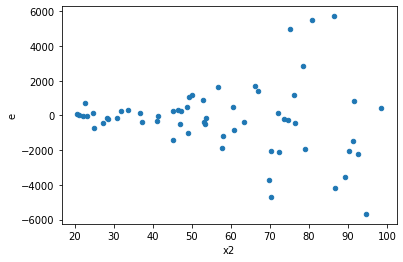

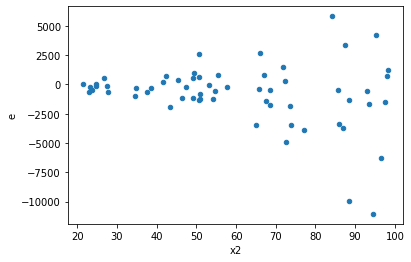

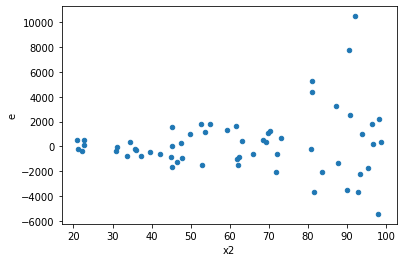

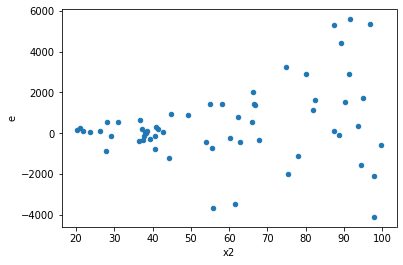

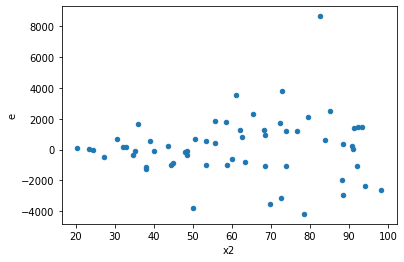

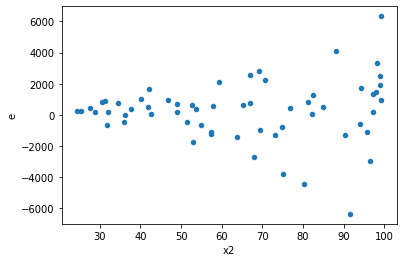

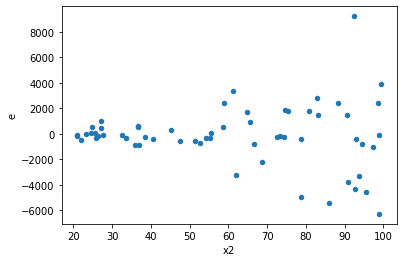

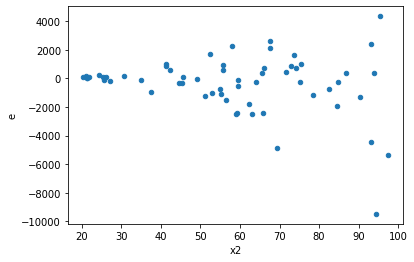

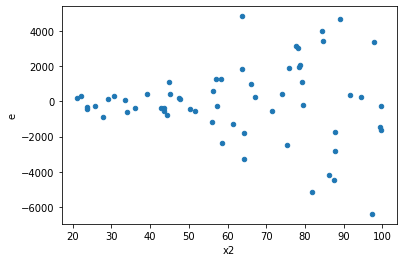

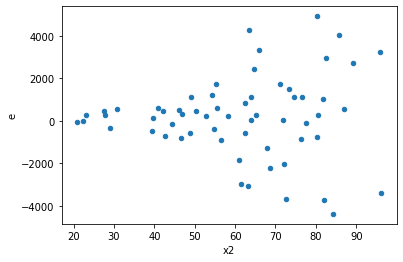

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,20.0,20.0,33442273.269116774,165939227.0549496,1672113.6634558388,8296961.35274748,4.961960143068113,0.0007421858489158328,0.9996289070755421,0.0003710929244579164,Reject001=0 : Heteroscedasticity
3.0,20.0,20.0,21618629.44067512,63635206.529361695,1080931.472033756,3181760.326468085,2.943535653080441,0.01978387610674548,0.9901080619466273,0.00989193805337274,Reject001=1 : Homoscedasticity
4.0,20.0,20.0,43366962.19089088,109414404.86497146,2168348.109544544,5470720.243248573,2.522989836902933,0.04450539924754904,0.9777473003762255,0.02225269962377452,Reject001=1 : Homoscedasticity
5.0,20.0,20.0,63868214.45491818,87682412.24324523,3193410.7227459094,4384120.612162261,1.3728646243138118,0.48494412585574453,0.7575279370721277,0.24247206292787227,Reject001=1 : Homoscedasticity
8.0,20.0,20.0,93501581.41346051,96186202.0335389,4675079.070673025,4809310.101676945,1.0287120343794731,0.9501561857166938,0.5249219071416531,0.4750780928583469,Reject001=1 : Homoscedasticity
9.0,20.0,20.0,47945684.928503335,65729444.31877541,2397284.2464251667,3286472.21593877,1.370914701016186,0.4868966627209297,0.7565516686395352,0.24344833136046484,Reject001=1 : Homoscedasticity
10.0,20.0,20.0,71356454.86955361,97376352.88150567,3567822.7434776807,4868817.644075284,1.3646467311123978,0.49322144748556296,0.7533892762572185,0.24661072374278148,Reject001=1 : Homoscedasticity
11.0,20.0,20.0,67165062.00254098,78122414.37956108,3358253.100127049,3906120.718978054,1.1631406575133596,0.7387036497461859,0.6306481751269071,0.3693518248730929,Reject001=1 : Homoscedasticity
12.0,20.0,20.0,65746728.19414036,67371925.50992946,3287336.409707018,3368596.275496473,1.0247190599506355,0.9569967139145137,0.5215016430427432,0.47849835695725684,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,99187985.83166386,53433666.74758326,4959399.2915831935,2671683.337379163,0.5387110777535881,0.17526532588038926,Reject001=1 : Homoscedasticity
1.0,20.0,20.0,162737299.22434652,18770525.875342377,8136864.961217326,938526.2937671188,0.11534249348371997,1.0664901214367906e-05,Reject001=0 : Heteroscedasticity
2.0,20.0,20.0,33442273.269116774,165939227.0549496,1672113.6634558388,8296961.35274748,4.961960143068113,0.0007421858489158328,Reject001=0 : Heteroscedasticity
3.0,20.0,20.0,21618629.44067512,63635206.529361695,1080931.472033756,3181760.326468085,2.943535653080441,0.01978387610674548,Reject001=1 : Homoscedasticity
4.0,20.0,20.0,43366962.19089088,109414404.86497146,2168348.109544544,5470720.243248573,2.522989836902933,0.04450539924754904,Reject001=1 : Homoscedasticity
5.0,20.0,20.0,63868214.45491818,87682412.24324523,3193410.7227459094,4384120.612162261,1.3728646243138118,0.48494412585574453,Reject001=1 : Homoscedasticity
6.0,20.0,20.0,116131067.02595238,89289375.91856432,5806553.351297619,4464468.795928216,0.7688672652823415,0.5621830564135755,Reject001=1 : Homoscedasticity
7.0,20.0,20.0,129112330.36333938,25676415.868117373,6455616.518166969,1283820.7934058686,0.1988688128845673,0.0006760558938748673,Reject001=0 : Heteroscedasticity
8.0,20.0,20.0,93501581.41346051,96186202.0335389,4675079.070673025,4809310.101676945,1.0287120343794731,0.9501561857166938,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      589
Reject001=0 : Heteroscedasticity    411
Name: Result_test, dtype: int64